# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)
### José Carlos Sánchez Gómez
### 30 de agosto del 2024


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
data = pd.read_csv('/content/drive/MyDrive/ML Data/Valhalla23.csv')
scaler = StandardScaler()
data[['Celsius']] = scaler.fit_transform(data[['Celsius']])

'''
Noté que usando los valores normales de Celsius, SDGRegressor me regresaba la tendencia correcta, pero los valores
eran muy grandes, asi que decidí escalarlos, y se obtuv[].
'''
x_train, x_test, y_train, y_test = train_test_split(data[['Celsius']], data[['Valks']], test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.5)

model = linear_model.SGDRegressor(max_iter = 100000000, random_state=4050, eta0=0.0001)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0001, max_iter=100000000, random_state=4050)

In [123]:
mse_train_base = metrics.mean_squared_error(y_train, model.predict(x_train))
mse_validate_base = metrics.mean_squared_error(y_validate, model.predict(x_validate))
mse_test_base = metrics.mean_squared_error(y_test, model.predict(x_test))

print("MSE Entrenamiento: ", mse_train_base)
print("MSE Validación: ", mse_validate_base)
print("MSE Prueba: ", mse_test_base)

MSE Entrenamiento:  58.5209997863365
MSE Validación:  36.01624933419069
MSE Prueba:  54.06523315194054


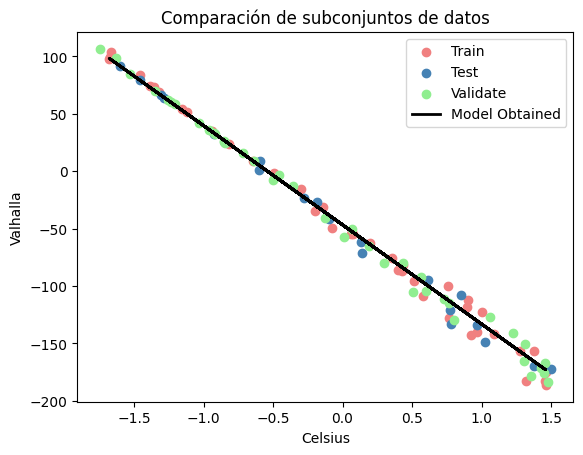

In [124]:
plt.scatter(x_train, y_train, color='lightcoral')
plt.scatter(x_test, y_test, color='steelblue')
plt.scatter(x_validate, y_validate, color="lightgreen")
plt.plot(x_train, model.predict(x_train), color='black', linewidth=2)
#Escribir la leyenda
plt.legend(["Train", "Test", "Validate", "Model Obtained"])
plt.title("Comparación de subconjuntos de datos")
plt.xlabel("Celsius")
plt.ylabel("Valhalla")
plt.show()

In [125]:
sizes = [2]
while len(sizes) != 20:
  random_number = random.randint(3, 39)
  if random_number not in sizes:
    sizes.append(random_number)
sizes

[2, 3, 32, 10, 22, 30, 18, 9, 15, 36, 6, 29, 34, 28, 12, 39, 38, 37, 17, 8]

In [126]:
mse_train_list, mse_validate_list = [], []

for size in sizes:
  x_train_size, _, y_train_size, _ = train_test_split(x_train[["Celsius"]], y_train[["Valks"]].values.ravel(), train_size=size)
  mse_train_average, mse_validate_average = 0, 0
  for _ in range(100):
    model.fit(x_train_size, y_train_size)
    mse_train = metrics.mean_squared_error(y_train_size, model.predict(x_train_size))
    mse_validate = metrics.mean_squared_error(y_validate, model.predict(x_validate))
    mse_train_average += mse_train
    mse_validate_average += mse_validate
  mse_train_average /= 100
  mse_validate_average /= 100
  mse_train_list.append(mse_train_average)
  mse_validate_list.append(mse_validate_average)

In [127]:
sizes.append(len(x_train))
mse_train_list.append(mse_train)
mse_validate_list.append(mse_validate)

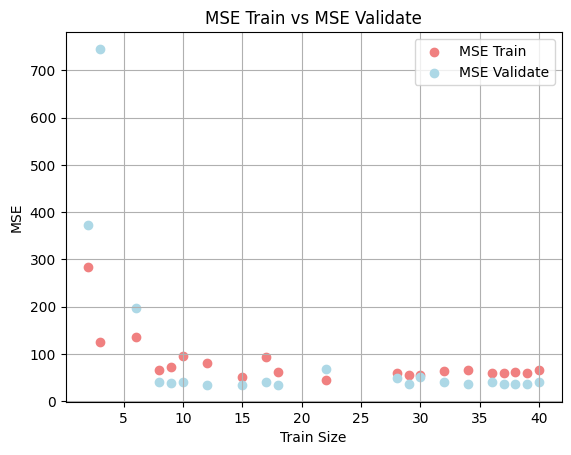

In [128]:
plt.scatter(sizes, mse_train_list, color='lightcoral', marker='o', linestyle='-', label="MSE Train")
plt.scatter(sizes, mse_validate_list, color='lightblue', marker='o', linestyle='-', label="MSE Validate")
plt.title("MSE Train vs MSE Validate")
plt.xlabel("Train Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

### Considero que la cantidad mejor de muestras es el que nos otorga un error minimo cuadrado

In [129]:
optimal_size = sizes[mse_validate_list.index(min(mse_validate_list))]
optimal_size

18

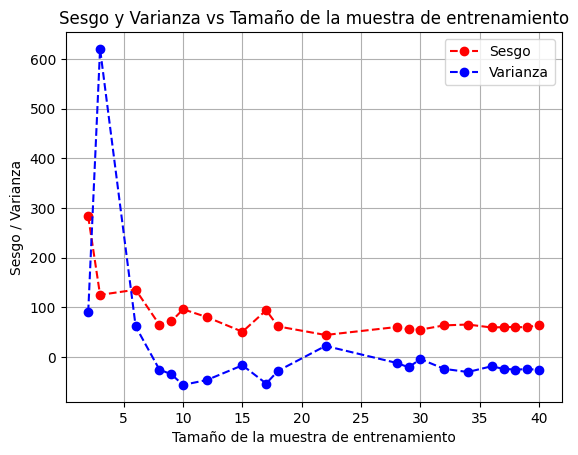

In [130]:
bias_list = mse_train_list
variance_list = [mse_validate - mse_train for mse_train, mse_validate in zip(mse_train_list, mse_validate_list)]

combined = list(zip(sizes, bias_list, variance_list))
combined_sorted = sorted(combined, key=lambda x: x[0])
sizes_sorted, bias_list_sorted, variance_list_sorted = zip(*combined_sorted)

plt.plot(sizes_sorted, bias_list_sorted, color='red', marker='o', linestyle='--', label="Sesgo")
plt.plot(sizes_sorted, variance_list_sorted, color='blue', marker='o', linestyle='--', label="Varianza")
plt.title("Sesgo y Varianza vs Tamaño de la muestra de entrenamiento")
plt.xlabel("Tamaño de la muestra de entrenamiento")
plt.ylabel("Sesgo / Varianza")
plt.legend()
plt.grid(True)
plt.show()

#### Con la gráfica podemos entender que cuando los valores de entrenamientos son menores (2) hay una gran sesgo y varianza, en comparación cuando hay muchos más valores de entrenamiento

In [131]:
  x_train_size, _, y_train_size, _ = train_test_split(x_train, y_train, train_size=optimal_size)
  model.fit(x_train_size, y_train_size)
  mse_train_size = metrics.mean_squared_error(y_train_size, model.predict(x_train_size))
  mse_validate_size = metrics.mean_squared_error(y_validate, model.predict(x_validate))
  mse_test_size = metrics.mean_squared_error(y_test, model.predict(x_test))

  print("Optimal Size MSE Train Subset: ", mse_train_size)
  print("Optimal Size MSE Test: ", mse_test_size)
  print("Optimal Size MSE Validate: ", mse_validate_size )

Optimal Size MSE Train Subset:  90.09218559343947
Optimal Size MSE Test:  106.846637207059
Optimal Size MSE Validate:  92.20795398608645


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


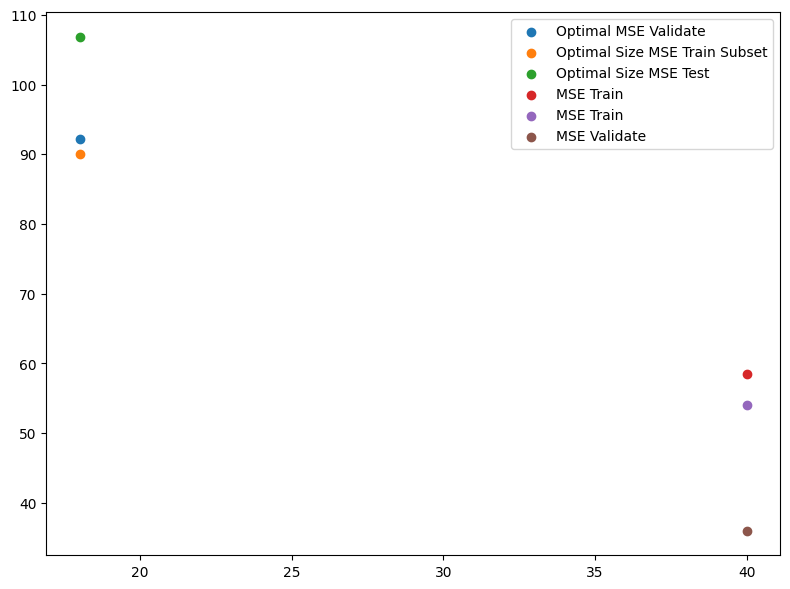

In [132]:
plt.figure(figsize=(8, 6))
plt.scatter(optimal_size, mse_validate_size, label="Optimal MSE Validate")
plt.scatter(optimal_size, mse_train_size, label="Optimal Size MSE Train Subset")
plt.scatter(optimal_size, mse_test_size, label="Optimal Size MSE Test")

plt.scatter(len(x_train), mse_train_base, label="MSE Train")
plt.scatter(len(x_train), mse_test_base, label="MSE Train")
plt.scatter(len(x_train), mse_validate_base, label="MSE Validate")

plt.legend(fontsize='medium')
plt.tight_layout()
plt.show()

#### Considero que funciono mejor el modelo base, puesto que los valores de los errores medios cuadrados son menores que con el supuesto modelo con tamaño ideal


In [136]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/AnálisisReporteDesempeño.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/AnálisisReporteDesempeño.ipynb to html
[NbConvertApp] Writing 790500 bytes to /content/drive/MyDrive/ColabNotebooks/AnálisisReporteDesempeño.html
